In [12]:
import pygplates
import math
import numpy as np
import matplotlib.pyplot as plt
import glob

%matplotlib inline


def BoundaryLengthCheck(GPML_List,RotFile_List,min_time,max_time,time_step,
                        BoundaryType='SubductionZone'):

    rotation_model = pygplates.RotationModel(RotFile_List)
    topology_features = pygplates.FeatureCollection()
    for file in GPML_List:
        topology_feature = pygplates.FeatureCollection(file)
        topology_features.add(topology_feature)
    #'''

    SL1_length = []
    SL2_length = []

    times = np.arange(min_time,max_time + 1,time_step)
    # 'time' = 0, 1, 2, ... , max time
    for time in times:

        # Resolve our topological plate polygons (and deforming networks) to the current 'time'.
        # We generate both the resolved topology boundaries and the boundary sections between them.
        resolved_topologies = []
        shared_boundary_sections = []
        pygplates.resolve_topologies(topology_features, rotation_model, resolved_topologies, time, shared_boundary_sections)

        # We will accumulate the total ridge and subduction zone lengths for the current 'time'.
        total_subduction_zone_length_1 = 0
        total_subduction_zone_length_2 = 0

        # Method 1
        for shared_boundary_section in shared_boundary_sections:

            # Iterate over the shared sub-segments to accumulate their lengths.
            shared_sub_segments_length = 0
            for shared_sub_segment in shared_boundary_section.get_shared_sub_segments():

                # Each sub-segment has a polyline with a length.
                shared_sub_segments_length += shared_sub_segment.get_geometry().get_arc_length()

            if shared_boundary_section.get_feature().get_feature_type() == pygplates.FeatureType.create_gpml(BoundaryType):
                total_subduction_zone_length_1 += shared_sub_segments_length            

        # Method 2
        for polygon in resolved_topologies:

            for seg in polygon.get_boundary_sub_segments():   
                if seg.get_resolved_feature().get_feature_type() == pygplates.FeatureType.create_gpml(BoundaryType):
                    total_subduction_zone_length_2 += seg.get_geometry().get_arc_length()


        total_subduction_zone_length_1_in_kms = total_subduction_zone_length_1 * pygplates.Earth.mean_radius_in_kms
        total_subduction_zone_length_2_in_kms = total_subduction_zone_length_2 * pygplates.Earth.mean_radius_in_kms

        SL1_length.append(total_subduction_zone_length_1_in_kms)
        SL2_length.append(total_subduction_zone_length_2_in_kms)
        
    return SL1_length,SL2_length



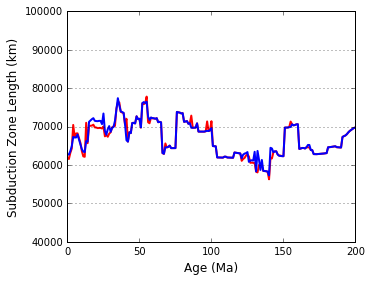

In [3]:
RotFile_List = ['../Data/Global_EarthByte_230-0Ma_GK07_AREPS.rot']
GPML_List = ['../Data/Global_EarthByte_230-0Ma_GK07_AREPS_PlateBoundaries.gpmlz',
             '../Data/Global_EarthByte_230-0Ma_GK07_AREPS_Topology_BuildingBlocks.gpmlz']

min_time = 0
max_time = 200
time_step = 1.
    
#RotFile_List = ['/Users/Simon/GIT/pygplates-alpha/tutorials-sv/Data/Seton_etal_ESR2012_2012.1.rot']
#GPML_List = ['/Users/Simon/GIT/pygplates-alpha/tutorials-sv/Data/Seton_etal_ESR2012_PP_2012.1.gpmlz']

#RotFile_List = ['/Users/Simon/Documents/pubs/TrenchMigration/SuppMatt/V2010/Shephard_etal_ESR2013_Global_EarthByte_V2010.rot']
#GPML_List = ['/Users/Simon/Documents/pubs/TrenchMigration/SuppMatt/V2010/Shephard_etal_ESR2013_Global_EarthByte_V2010.gpml']

#RotFile_List = ['/Users/Simon/Data/EByteSVN/EByteDeformingModels/Matthews++_410-0Ma/Global_EB_250-0Ma_GK07_Matthews_etal.rot',
#               '/Users/Simon/Data/EByteSVN/EByteDeformingModels/Matthews++_410-0Ma/Global_EB_410-250Ma_GK07_Matthews_etal.rot']
#GPML_List = ['/Users/Simon/Data/EByteSVN/EByteDeformingModels/Matthews++_410-0Ma/Global_EarthByte_Mesozoic-Cenozoic_plate_boundaries_Matthews_etal.gpml',
#            '/Users/Simon/Data/EByteSVN/EByteDeformingModels/Matthews++_410-0Ma/Global_EarthByte_Paleozoic_plate_boundaries_Matthews_etal.gpml',
#            '/Users/Simon/Data/EByteSVN/EByteDeformingModels/Matthews++_410-0Ma/TopologyBuildingBlocks_AREPS.gpml']

#out_filename = 'test.csv'

SL1_length,SL2_length = BoundaryLengthCheck(GPML_List,RotFile_List,min_time,max_time,time_step)

times = np.arange(min_time,max_time + 1,time_step)

fig = plt.figure(figsize=(8,4))

fig.add_axes([0.15, 0.15, 0.5, 0.8])
plt.plot(times,np.array(SL2_length)/2,'r',linewidth=2)
plt.plot(times,np.array(SL1_length),'b',linewidth=2)

plt.ylim((40000,100000))
plt.ylabel('Subduction Zone Length (km)',fontsize=12)
plt.xlim((0,200))
plt.xlabel('Age (Ma)',fontsize=12)
plt.gca().yaxis.grid(True,which='major')

plt.show()

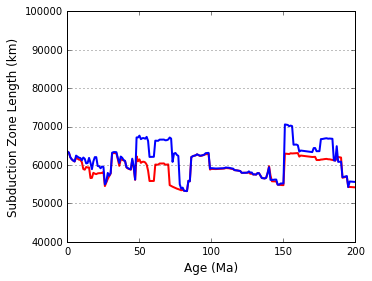

In [6]:

RotFile_List = ['/Users/Simon/GIT/pygplates-alpha/tutorials-sv/Data/Seton_etal_ESR2012_2012.1.rot']
GPML_List = ['/Users/Simon/GIT/pygplates-alpha/tutorials-sv/Data/Seton_etal_ESR2012_PP_2012.1.gpmlz']

#RotFile_List = ['/Users/Simon/Documents/pubs/TrenchMigration/SuppMatt/V2010/Shephard_etal_ESR2013_Global_EarthByte_V2010.rot']
#GPML_List = ['/Users/Simon/Documents/pubs/TrenchMigration/SuppMatt/V2010/Shephard_etal_ESR2013_Global_EarthByte_V2010.gpml']

#RotFile_List = ['/Users/Simon/Data/EByteSVN/EByteDeformingModels/Matthews++_410-0Ma/Global_EB_250-0Ma_GK07_Matthews_etal.rot',
#               '/Users/Simon/Data/EByteSVN/EByteDeformingModels/Matthews++_410-0Ma/Global_EB_410-250Ma_GK07_Matthews_etal.rot']
#GPML_List = ['/Users/Simon/Data/EByteSVN/EByteDeformingModels/Matthews++_410-0Ma/Global_EarthByte_Mesozoic-Cenozoic_plate_boundaries_Matthews_etal.gpml',
#            '/Users/Simon/Data/EByteSVN/EByteDeformingModels/Matthews++_410-0Ma/Global_EarthByte_Paleozoic_plate_boundaries_Matthews_etal.gpml',
#            '/Users/Simon/Data/EByteSVN/EByteDeformingModels/Matthews++_410-0Ma/TopologyBuildingBlocks_AREPS.gpml']

SL1_length_2012,SL2_length_2012 = BoundaryLengthCheck(GPML_List,RotFile_List,min_time,max_time,time_step)

times = np.arange(min_time,max_time + 1,time_step)


fig = plt.figure(figsize=(8,4))

fig.add_axes([0.15, 0.15, 0.5, 0.8])
plt.plot(times,np.array(SL2_length_2012)/2,'r',linewidth=2)
plt.plot(times,np.array(SL1_length_2012),'b',linewidth=2)

plt.ylim((40000,80000))
plt.ylabel('Subduction Zone Length (km)',fontsize=12)
plt.xlim((0,200))
plt.xlabel('Age (Ma)',fontsize=12)
plt.gca().yaxis.grid(True,which='major')

plt.show()


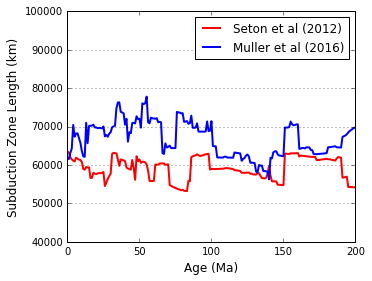

In [7]:
fig = plt.figure(figsize=(8,4))

fig.add_axes([0.15, 0.15, 0.5, 0.8])
l1, = plt.plot(times,np.array(SL2_length_2012)/2,'r',linewidth=2,label='Seton et al (2012)')
plt.plot(times,np.array(SL2_length)/2,'b',linewidth=2,label='Muller et al (2016)')

plt.ylim((40000,100000))
plt.ylabel('Subduction Zone Length (km)',fontsize=12)
plt.xlim((0,200))
plt.xlabel('Age (Ma)',fontsize=12)
plt.gca().yaxis.grid(True,which='major')
plt.legend()

plt.savefig('SubductionZoneLength_ModelComparison.pdf')

plt.show()


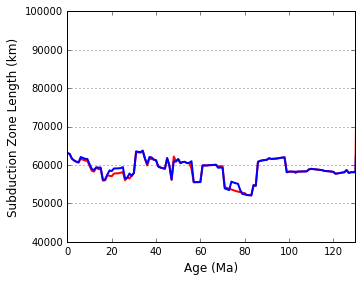

In [5]:
RotFile_List = ['/Users/Simon/Documents/pubs/TrenchMigration/SuppMatt/V2010/Shephard_etal_ESR2013_Global_EarthByte_V2010.rot']
GPML_List = ['/Users/Simon/Documents/pubs/TrenchMigration/SuppMatt/V2010/Shephard_etal_ESR2013_Global_EarthByte_V2010.gpml']

#RotFile_List = ['/Users/Simon/Data/EByteSVN/EByteDeformingModels/Matthews++_410-0Ma/Global_EB_250-0Ma_GK07_Matthews_etal.rot',
#               '/Users/Simon/Data/EByteSVN/EByteDeformingModels/Matthews++_410-0Ma/Global_EB_410-250Ma_GK07_Matthews_etal.rot']
#GPML_List = ['/Users/Simon/Data/EByteSVN/EByteDeformingModels/Matthews++_410-0Ma/Global_EarthByte_Mesozoic-Cenozoic_plate_boundaries_Matthews_etal.gpml',
#            '/Users/Simon/Data/EByteSVN/EByteDeformingModels/Matthews++_410-0Ma/Global_EarthByte_Paleozoic_plate_boundaries_Matthews_etal.gpml',
#            '/Users/Simon/Data/EByteSVN/EByteDeformingModels/Matthews++_410-0Ma/TopologyBuildingBlocks_AREPS.gpml']

SL1_length,SL2_length = BoundaryLengthCheck(GPML_List,RotFile_List,min_time,max_time,time_step)

times = np.arange(min_time,max_time + 1,time_step)


fig = plt.figure(figsize=(8,4))

fig.add_axes([0.15, 0.15, 0.5, 0.8])
plt.plot(times,np.array(SL2_length)/2,'r',linewidth=2)
plt.plot(times,np.array(SL1_length),'b',linewidth=2)

plt.ylim((40000,80000))
plt.ylabel('Subduction Zone Length (km)',fontsize=12)
plt.xlim((0,130))
plt.xlabel('Age (Ma)',fontsize=12)
plt.gca().yaxis.grid(True,which='major')

plt.show()



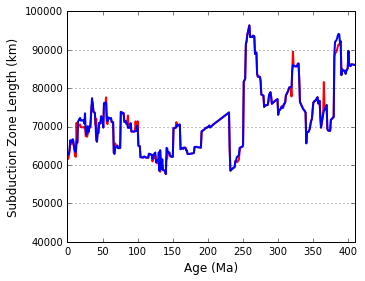

In [6]:
RotFile_List = ['/Users/Simon/Data/EByteSVN/EByteDeformingModels/Matthews++_410-0Ma/Global_EB_250-0Ma_GK07_Matthews_etal.rot',
               '/Users/Simon/Data/EByteSVN/EByteDeformingModels/Matthews++_410-0Ma/Global_EB_410-250Ma_GK07_Matthews_etal.rot']
GPML_List = ['/Users/Simon/Data/EByteSVN/EByteDeformingModels/Matthews++_410-0Ma/Global_EarthByte_Mesozoic-Cenozoic_plate_boundaries_Matthews_etal.gpml',
            '/Users/Simon/Data/EByteSVN/EByteDeformingModels/Matthews++_410-0Ma/Global_EarthByte_Paleozoic_plate_boundaries_Matthews_etal.gpml',
            '/Users/Simon/Data/EByteSVN/EByteDeformingModels/Matthews++_410-0Ma/TopologyBuildingBlocks_AREPS.gpml']

min_time = 0
max_time = 410.
time_step = 1.
 
SL1_length,SL2_length = BoundaryLengthCheck(GPML_List,RotFile_List,min_time,max_time,time_step)

times = np.arange(min_time,max_time + 1,time_step)


fig = plt.figure(figsize=(8,4))

fig.add_axes([0.15, 0.15, 0.5, 0.8])
plt.plot(times,np.array(SL2_length)/2,'r',linewidth=2)
plt.plot(times,np.array(SL1_length),'b',linewidth=2)

plt.ylim((40000,100000))
plt.ylabel('Subduction Zone Length (km)',fontsize=12)
plt.xlim((0,410))
plt.xlabel('Age (Ma)',fontsize=12)
plt.gca().yaxis.grid(True,which='major')

plt.show()



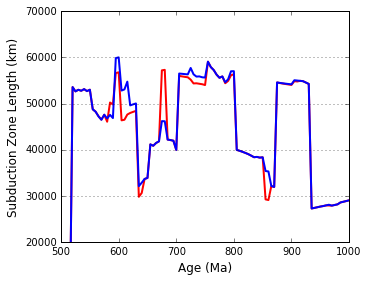

In [15]:
RotFile_List = ['/Users/Simon/Work/Students/Merdo/Rodinia-Gondwana_20161213/Rod-Gondw_Palaeozoic_20161213.rot']
GPML_List = ['/Users/Simon/Work/Students/Merdo/Rodinia-Gondwana_20161213/Convergence_20161213.gpml',
            '/Users/Simon/Work/Students/Merdo/Rodinia-Gondwana_20161213/Divergence_20161213.gpml',
            '/Users/Simon/Work/Students/Merdo/Rodinia-Gondwana_20161213/Rod-Gondw_intraplate_20161207.gpml',
            '/Users/Simon/Work/Students/Merdo/Rodinia-Gondwana_20161213/Topologies_20161213.gpml',
            '/Users/Simon/Work/Students/Merdo/Rodinia-Gondwana_20161213/Transform_20161213.gpml']

min_time = 500
max_time = 1000.
time_step = 5.

SL1_length,SL2_length = BoundaryLengthCheck(GPML_List,RotFile_List,
                                            min_time,max_time,time_step,'MidOceanRidge')

times = np.arange(min_time,max_time + 1,time_step)


fig = plt.figure(figsize=(8,4))

fig.add_axes([0.15, 0.15, 0.5, 0.8])
plt.plot(times,np.array(SL2_length)/2,'r',linewidth=2)
plt.plot(times,np.array(SL1_length),'b',linewidth=2)

plt.ylim((20000,70000))
plt.ylabel('Subduction Zone Length (km)',fontsize=12)
plt.xlim((500,1000))
plt.xlabel('Age (Ma)',fontsize=12)
plt.gca().yaxis.grid(True,which='major')

plt.show()

